In [1]:
#libraries for normality tests
import pandas as pd
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#import the User Datasets
xls = pd.ExcelFile('Load_Time_Per_Page.xlsx')

Home = pd.read_excel(xls, 'home')
Basket= pd.read_excel(xls, 'basket')
Redisign_bags= pd.read_excel(xls, 'redesign_bags')
Shop_by_brand_YouTube= pd.read_excel(xls, 'shop_by_brand_YouTube')
Signin= pd.read_excel(xls, 'signin')
Mens_warm_gear = pd.read_excel(xls, 'mens_warm_gear')

#Remove the dates for ease
Home = Home['Avg. Page Load Time (sec)']
Basket = Basket['Avg. Page Load Time (sec)']
Redisign_bags= Redisign_bags['Avg. Page Load Time (sec)']
Shop_by_brand_YouTube= Shop_by_brand_YouTube['Avg. Page Load Time (sec)']
Signin= Signin['Avg. Page Load Time (sec)']
Mens_warm_gear = Mens_warm_gear['Avg. Page Load Time (sec)']

#convert datasets into arrays
Home = Home.values
Basket = Basket.values
Redisign_bags= Redisign_bags.values
Shop_by_brand_YouTube= Shop_by_brand_YouTube.values
Signin= Signin.values
Mens_warm_gear = Mens_warm_gear.values

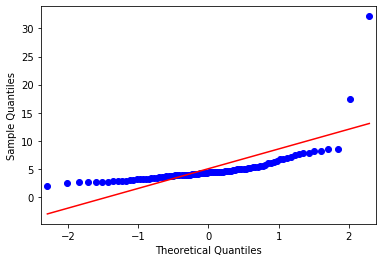

In [2]:
#plot both datasets using qqplot to check for normality
qqplot(Home, line='s')
pyplot.show()

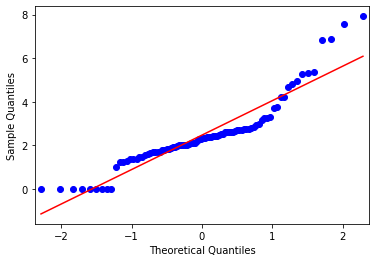

In [3]:
qqplot(Basket, line='s')
pyplot.show()

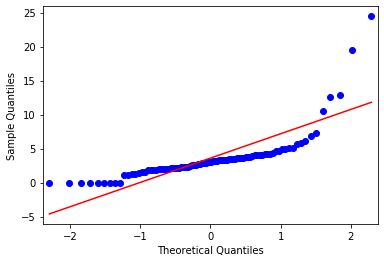

In [4]:
qqplot(Redisign_bags, line='s')

pyplot.show()

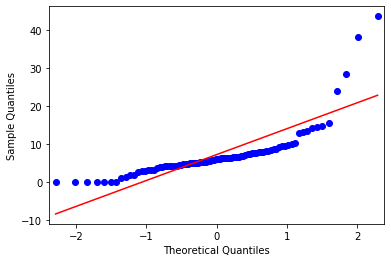

In [5]:
qqplot(Shop_by_brand_YouTube, line='s')

pyplot.show()

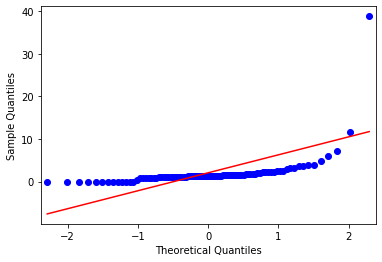

In [6]:
qqplot(Signin, line='s')

pyplot.show()

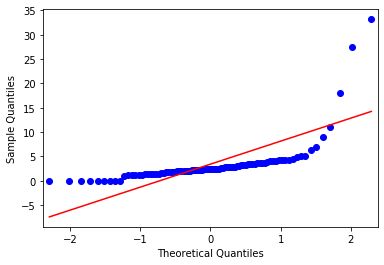

In [7]:
qqplot(Mens_warm_gear, line='s')

pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [8]:
names = ["Homeh", "Basket", "Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Home, Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
#Since not all datasets are normaly distributed non-parametric tests should be used.

Homeh
Statistics=0.491, p=0.000
Sample does not look Gaussian (reject H0)
Basket
Statistics=0.881, p=0.000
Sample does not look Gaussian (reject H0)
Redisign_bags
Statistics=0.640, p=0.000
Sample does not look Gaussian (reject H0)
Shop_by_brand_YouTube
Statistics=0.674, p=0.000
Sample does not look Gaussian (reject H0)
Signin
Statistics=0.310, p=0.000
Sample does not look Gaussian (reject H0)
Mens_warm_gear
Statistics=0.480, p=0.000
Sample does not look Gaussian (reject H0)


In [9]:
#import Kruskal�Wallis test: Non parametric method for testing whether samples originate from the same distribution.
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

stat, p = kruskal(Home, Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=198.784, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [10]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [11]:
#Organic against every other Channel
names = ["Basket", "Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
    stat, p = ranksums(Home,i)
    print('Home-',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Home- Basket
Statistics=8.749, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Redisign_bags
Statistics=5.948, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Shop_by_brand_YouTube
Statistics=-3.631, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Signin
Statistics=10.048, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Mens_warm_gear
Statistics=7.457, p=0.000
The difference between the two datasets is significant (reject H0)


In [12]:
#Basket against every other Channel
names = ["Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
    stat, p = ranksums(Basket,i)
    print('Basket-',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Basket- Redisign_bags
Statistics=-3.000, p=0.003
The difference between the two datasets is significant (reject H0)
Basket- Shop_by_brand_YouTube
Statistics=-7.898, p=0.000
The difference between the two datasets is significant (reject H0)
Basket- Signin
Statistics=5.220, p=0.000
The difference between the two datasets is significant (reject H0)
Basket- Mens_warm_gear
Statistics=-1.132, p=0.258
The difference between the two datasets is not significant (fail to reject H0)


In [13]:
#Refferal against Shop_by_brand_YouTube, Signin, Mens_warm_gear
names = ["Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
    stat, p = ranksums(Redisign_bags,i)
    print('Redisign_bags-',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Redisign_bags- Shop_by_brand_YouTube
Statistics=-6.476, p=0.000
The difference between the two datasets is significant (reject H0)
Redisign_bags- Signin
Statistics=6.350, p=0.000
The difference between the two datasets is significant (reject H0)
Redisign_bags- Mens_warm_gear
Statistics=1.682, p=0.093
The difference between the two datasets is not significant (fail to reject H0)


In [14]:
#Shop_by_brand_YouTubeagainst Signin, Mens_warm_gear
names = ["Signin", "Mens_warm_gear"]
for index, i in enumerate((Signin, Mens_warm_gear)):
    stat, p = ranksums(Shop_by_brand_YouTube,i)
    print('Shop_by_brand_YouTube-',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Shop_by_brand_YouTube- Signin
Statistics=8.641, p=0.000
The difference between the two datasets is significant (reject H0)
Shop_by_brand_YouTube- Mens_warm_gear
Statistics=7.105, p=0.000
The difference between the two datasets is significant (reject H0)


In [15]:
#Signin against Mens_warm_gear
stat, p = ranksums(Signin,Mens_warm_gear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')


Statistics=-5.349, p=0.000
The difference between the two datasets is significant (reject H0)
